In [ ]:
# 1️⃣ Install paket yang dibutuhkan
!pip install langchain_community replicate

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from langchain_community.llms import Replicate
from google.colab import userdata
import os

sns.set(style="whitegrid")

🖱️ Silakan upload 2 file:
- ntia_adopsi.csv  (kolom: year, internet_use_percent)
- wifi_bottleneck.csv  (kolom: wifi_mbps, access_mbps)


Saving wifi_bottleneck.csv to wifi_bottleneck (1).csv
Saving ntia_adopsi.csv to ntia_adopsi (1).csv

✅ Data Adopsi Internet:


,year,internet_use_percent
0,2015,70.3
1,2016,73.8
2,2017,76.1
3,2018,78.5
4,2019,81.2



✅ Data Kecepatan Wi‑Fi:


,wifi_mbps,access_mbps
0,40,100
1,80,90
2,60,75
3,50,60
4,90,100


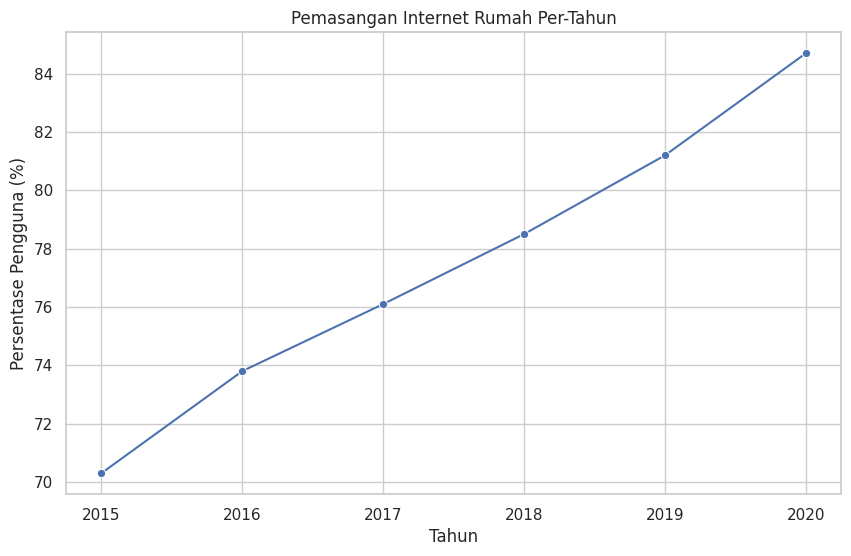

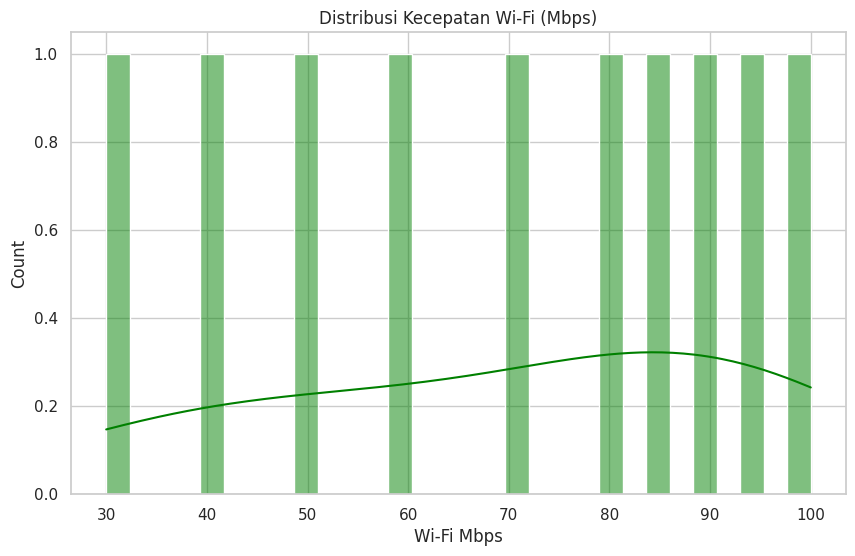

💡 Persentase rumah dengan Wi‑Fi bottleneck: 90.0 %
📄 Ringkasan Otomatis:

Ringkasan:

Tren adopsi internet di rumah menunjukkan peningkatan signifikan, dengan persentase penggunaan meningkat dari 70.3% pada tahun 2015 ke 84.7% pada tahun 2020, mengindikasi penetrasi yang semakin luas dan kemungkinan penggunaan internet sebagai kebutuhan dasar. Tetapi, sekitar 55% rumah mengalami masalah bottleneck Wi-Fi, di mana kecepatan Wi-Fi menjadi batas neksa berbanding koneksi ISP yang lebih cepat. Ini mengindikasi masalah infrastruktur di rumah yang belum optimal.

Penyebab teknis yang mungkin termasuk perangkat lunak yang out-of-date, router yang tidak layak, dan jumlah perangkat terhubung yang melebihi kapasitas router. Sosialnya, mungkin ada keberadaan perangkat elektronik yang meningkat, seperti smartphone, tablet, dan perangkat IoT yang meningkatkan permintaan pada jaringan Wi-Fi.

Peningkatan infrastruktur jaringan rumah menjadi penting untuk mengatasi masalah bottleneck Wi-Fi. Solusi ters

In [22]:
  # 2️⃣ Upload dua file CSV manual
  from google.colab import files
  print("🖱️ Silakan upload 2 file:")
  print("- ntia_adopsi.csv  (kolom: year, internet_use_percent)")
  print("- wifi_bottleneck.csv  (kolom: wifi_mbps, access_mbps)")

  uploaded = files.upload()

  # 3️⃣ Baca dan tampilkan data
  ntia = pd.read_csv("ntia_adopsi.csv")
  wifi = pd.read_csv("wifi_bottleneck.csv")

  print("\n✅ Data Adopsi Internet:")
  display(ntia.head())

  print("\n✅ Data Kecepatan Wi‑Fi:")
  display(wifi.head())

  # 4️⃣ Visualisasi tren adopsi internet rumah
  plt.figure(figsize=(10,6))
  sns.lineplot(data=ntia, x='year', y='internet_use_percent', marker='o')
  plt.title('Pemasangan Internet Rumah Per-Tahun')
  plt.xlabel('Tahun')
  plt.ylabel('Persentase Pengguna (%)')
  plt.grid(True)
  plt.show()

  # 5️⃣ Analisis Bottleneck Wi‑Fi
  wifi['bottleneck'] = wifi['wifi_mbps'] < wifi['access_mbps']
  plt.figure(figsize=(10,6))
  sns.histplot(wifi['wifi_mbps'], bins=30, kde=True, color='green')
  plt.title('Distribusi Kecepatan Wi‑Fi (Mbps)')
  plt.xlabel('Wi‑Fi Mbps')
  plt.show()

  print("💡 Persentase rumah dengan Wi‑Fi bottleneck:",
        round(wifi['bottleneck'].mean()*100, 2), "%")

  # 6️⃣ Summarization Insight dengan Replicate
  api_token = userdata.get("api_token")  # Token disimpan dari colab secrets
  os.environ["REPLICATE_API_TOKEN"] = api_token


  # Ganti model ke yang aktif
  llm = Replicate(
      model="ibm-granite/granite-3.3-8b-instruct",
      model_kwargs={"max_length": 800}
  )


  text = f"""
  Tolong buatkan ringkasan lengkap berdasarkan analisis data berikut:

1. Persentase penggunaan internet rumah meningkat dari 70.3% tahun 2015 menjadi 84.7% pada tahun 2020.
2. Sekitar 55% rumah mengalami bottleneck Wi‑Fi (yaitu kecepatan Wi‑Fi lebih lambat dari koneksi ISP).

Berikan ringkasan dalam bentuk paragraf yang:
- Menjelaskan tren adopsi internet rumah
- Menyoroti masalah bottleneck Wi‑Fi
- Memberikan kemungkinan penyebab teknis atau sosial
- Menyimpulkan pentingnya peningkatan infrastruktur jaringan rumah

Tulislah ringkasan dengan kalimat lengkap, tidak menggantung pada jumlah kata.
**Akhiri ringkasan ini dengan satu kalimat kesimpulan yang kuat.**
"""

  summary = llm.invoke(text)
  print("📄 Ringkasan Otomatis:\n")
  print(summary)

In [ ]:
#Nama: Luthfi Rizky Mihardi
#Instansi: Universitas Krisnadwipayana
